Jair Sànchez Sierra  cc:1003231158

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













##Primer punto

\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

In [96]:

def max_al(R):
  g = 9.8
  v0 = 55  #velocidad inicial
  alpha = 45 #angulo
  v0_x = v0 * np.cos(alpha)
  v0_y = v0 * np.sin(alpha)
  b = 0.005
  t1 = (g/b)+v0_y
  t2= R/v0_x
  t3 = g/(b**2)
  t4 = np.log(1-((R*b)/v0_x))
  y = t1*t2 + t3*t4
  return y



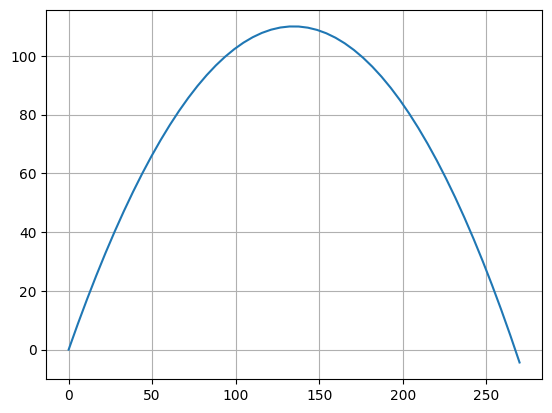

In [97]:
R = np.linspace(0,270,50)
F = max_al(R)
plt.plot(R,F)
plt.grid()
plt.show()

In [108]:
#Metodo de bisección
raiz = sp.optimize.bisect(max_al,260,270)
print("Esta es la raiz: ", raiz)

Esta es la raiz:  267.40610509984435


In [107]:
#Metodo de la secante
r = sp.optimize.newton(max_al,268)
print("esta es la raiz: ",r)



esta es la raiz:  267.4061050998319


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


In [138]:
def t_v(R):
  v0 = 55  #velocidad inicial
  alpha = 45 #angulo
  v0_x = v0 * np.cos(alpha)
  b = 0.005
  t = -(1/b)*np.log(1-((R*b)/v0_x))
  return t
tv = t_v(r)
print("Este es el tiempo de vuelo: ",tv)



Este es el tiempo de vuelo:  9.47612986379372


In [139]:
v0 = 55  #velocidad inicial
alpha = 45 #angulo
v0_x = v0 * np.cos(alpha)
b = 0.005
g = 9.8

fx = lambda t: v0* np.cos(alpha)*t
fy = lambda t: (v0 * np.sin(alpha)*t) - ((1/2)*g*((t)**2))



Cuarto punto

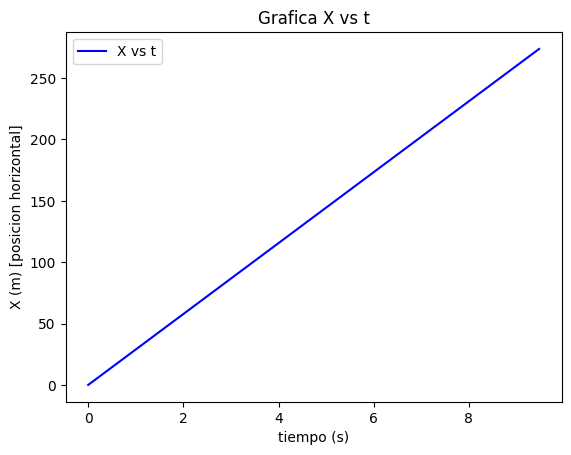

In [142]:
t = np.linspace(0,tv,100)


plt.plot(t,fx(t),"b-", label="X vs t")
plt.ylabel("X (m) [posicion horizontal]")
plt.xlabel("tiempo (s)")
plt.title("Grafica X vs t")
plt.legend()
plt.show()

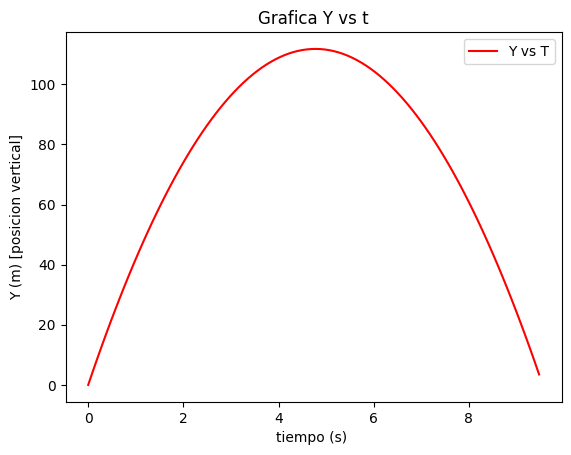

In [143]:
t = np.linspace(0,tv,100)
ft = np.zeros(np.shape(t))

plt.plot(t,fy(t), "r-", label = "Y vs T")


plt.xlabel("tiempo (s) ")
plt.ylabel("Y (m) [posicion vertical]")
plt.title("Grafica Y vs t")

plt.legend()
plt.show()

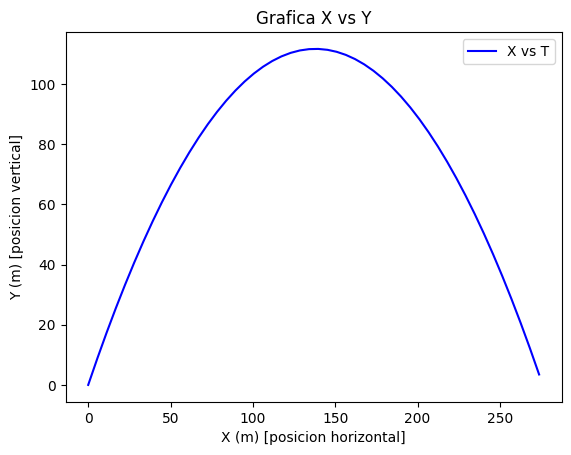

In [133]:
t = np.linspace(0,tv,50)


plt.plot(fx(t),fy(t),"b-", label="X vs T")
plt.xlabel("X (m) [posicion horizontal]")
plt.ylabel("Y (m) [posicion vertical]")
plt.title("Grafica X vs Y")
plt.legend()
plt.show()

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.


In [157]:

for i in alpha:
  def maxg_al(R, alpha):
    g = 9.8
    v0 = 40  #velocidad inicial
    #alpha=np.arange(0, 90, 5)

    #alpha = 45 #angulo
    v0_x = v0 * np.cos(alpha)
    v0_y = v0 * np.sin(alpha)
    b = 0.009
    t1 = (g/b)+v0_y
    t2= R/v0_x
    t3 = g/(b**2)
    t4 = np.log(1-((R*b)/v0_x))
    y = t1*t2 + t3*t4
  return y

alpha=np.arange(0, 90, 5)
for i in (alpha):
  R = np.linspace(0,270,50)
  y=maxg_al(R,i)
print(y)


SyntaxError: 'return' outside function (<ipython-input-157-bb9989d723bf>, line 16)

In [148]:

theta=np.arange(0, 90, 5)
#theta=np.deg2rad(theta)
print(theta)


[0.         0.08726646 0.17453293 0.26179939 0.34906585 0.43633231
 0.52359878 0.61086524 0.6981317  0.78539816 0.87266463 0.95993109
 1.04719755 1.13446401 1.22173048 1.30899694 1.3962634  1.48352986]
